In [166]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from settings import e
from IPython.display import display
from data_handler import DataHandler
from potential import Potential
from data_merger import DataMerger
from prediction import Prediction
from settings_for_ml import map_weights, POTENTIAL
from settings import e
pd.options.display.max_columns=100
pd.options.display.max_rows = 200

dh = DataHandler()
dme = DataMerger()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
file_list = os.listdir("../training_data_task2_simple_random_base")

In [155]:
df = dh.pickle_to_df("../training_data_task2_simple_random_base/" + file_list[0])

In [174]:
os.listdir("../agent_code/super_agent")

['callbacks_version.py',
 'p_task2_si_r.pickle',
 '2019-03-22_16-37_p_task1_si_r.pickle',
 '.DS_Store',
 '2019-03-23_10-56_p_task2_si_r.pickle',
 'p_task2_si_r.csv',
 'p_task1_si_r.pickle',
 '__pycache__',
 '2019-03-23_10-56_p_task2_si.csv',
 'logs',
 'callbacks.py',
 'p_task2_si.pickle',
 'p_task2_si.csv',
 'p_task1_si_r.csv',
 '2019-03-22_17-16_p_task1_si_r_final.pickle']

In [184]:
df_ = pd.read_csv("../agent_code/super_agent/2019-03-23_10-56_p_task2_si.csv", index_col=0)

In [186]:
df_[df_.NAME == "super_agent"].head()

CLOSEST_DISTANCE_BOMB  CLOSEST_DISTANCE_COIN  COIN_POTENTIAL_DOWN  \
0                  0.000                  0.893                0.718   
1                  1.000                  0.000                0.000   
2                  0.964                  0.000                0.000   
3                  0.964                  0.000                0.000   
4                  0.964                  0.000                0.000   

   COIN_POTENTIAL_LEFT  COIN_POTENTIAL_RIGHT  COIN_POTENTIAL_UP  \
0                0.718                 0.936              0.911   
1                0.000                 0.000              0.000   
2                0.000                 0.000              0.000   
3                0.000                 0.000              0.000   
4                0.000                 0.000              0.000   

   CRATES_TO_DESTROY_CENTER  CRATES_TO_DESTROY_DOWN  CRATES_TO_DESTROY_LEFT  \
0                         3                       0                       0   
1                         3                       0                       0   
2                         2                       0                       0   
3                         2                       0                       0   
4                         2                       0                       0   

   CRATES_TO_DESTROY_RIGHT  CRATES_TO_DESTROY_UP  DANGER_LEVEL_CENTER  \
0                        2                     2                 0.00   
1                        0                     0               -14.00   
2                        0                     6                -7.00   
3                        0                     6                -8.25   
4                        0                     6                -9.50   

   DANGER_LEVEL_DOWN  DANGER_LEVEL_LEFT  DANGER_LEVEL_RIGHT  DANGER_LEVEL_UP  \
0               0.00               0.00                0.00             0.00   
1              -3.25              -3.25               -5.25            -5.75   
2             -14.50              -0.75               -1.50            -3.75   
3             -15.00              -1.00               -2.00            -5.00   
4             -15.50              -1.25               -2.50            -6.25   

   DEAD_END_DOWN  DEAD_END_LEFT  DEAD_END_RIGHT  DEAD_END_UP  DOF_DOWN  \
0              0              0               1            0         0   
1              0              0               1            1         0   
2              0              0               0            1         2   
3              0              0               0            1         2   
4              0              0               0            1         2   

   DOF_LEFT  DOF_RIGHT  DOF_UP  GAME  MAX_COIN_POTENTIAL_DOWN  \
0         0          1       2     0                        0   
1         0          1       2     0                        0   
2         0          0       1     0                        0   
3         0          0       1     0                        0   
4         0          0       1     0                        0   

   MAX_COIN_POTENTIAL_LEFT  MAX_COIN_POTENTIAL_RIGHT  MAX_COIN_POTENTIAL_UP  \
0                        0                         1                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   

          NAME  NEXT_EVENT_BOMB  NEXT_EVENT_DOWN  NEXT_EVENT_LEFT  \
0  super_agent                1                0                0   
1  super_agent                0                0                0   
2  super_agent                0                0                0   
3  super_agent                0                0                0   
4  super_agent                0                0                0   

   NEXT_EVENT_RIGHT  NEXT_EVENT_UP  NEXT_EVENT

In [134]:
with open('../gamestate.pickle', 'rb') as f:
    d = pickle.load(f)

In [135]:
#df = pd.read_csv("../agent_code/super_agent/2019-03-22_16-37_p_task1_si_r.csv", index_col=0)

In [136]:
#df.head()

In [168]:
df = pd.read_csv("../dataForPrediction.csv", index_col=0)

In [169]:
df.columns

Index(['NAME', 'X', 'Y', 'STEP', 'ACTIVE_AGENTS', 'CLOSEST_DISTANCE_BOMB',
       'CLOSEST_DISTANCE_COIN', 'CLOSEST_DISTANCE_OTHERS',
       'COIN_POTENTIAL_DOWN', 'COIN_POTENTIAL_LEFT', 'COIN_POTENTIAL_RIGHT',
       'COIN_POTENTIAL_UP', 'CONTACT_TO_EXPLOSION_CENTER',
       'CONTACT_TO_EXPLOSION_DOWN', 'CONTACT_TO_EXPLOSION_LEFT',
       'CONTACT_TO_EXPLOSION_RIGHT', 'CONTACT_TO_EXPLOSION_UP',
       'CRATES_TO_DESTROY_CENTER', 'CRATES_TO_DESTROY_DOWN',
       'CRATES_TO_DESTROY_LEFT', 'CRATES_TO_DESTROY_RIGHT',
       'CRATES_TO_DESTROY_UP', 'DANGER_LEVEL_CENTER', 'DANGER_LEVEL_DOWN',
       'DANGER_LEVEL_LEFT', 'DANGER_LEVEL_RIGHT', 'DANGER_LEVEL_UP',
       'DEAD_END_DOWN', 'DEAD_END_LEFT', 'DEAD_END_RIGHT', 'DEAD_END_UP',
       'DOF_DOWN', 'DOF_LEFT', 'DOF_RIGHT', 'DOF_UP',
       'MAX_COIN_POTENTIAL_DOWN', 'MAX_COIN_POTENTIAL_LEFT',
       'MAX_COIN_POTENTIAL_RIGHT', 'MAX_COIN_POTENTIAL_UP',
       'MAX_OTHER_PLAYER_POTENTIAL_DOWN', 'MAX_OTHER_PLAYER_POTENTIAL_LEFT',
       'MA

In [190]:
imporant_columns = ["STEP", "AVAILABLE_ACTIONS", "NEXT_EVENT", "PROBABILITIES"] + [i for i in df.columns if i.startswith("CRATES_TO")]
df[["STEP", "NEXT_EVENT"] + [i for i in df.columns if i.startswith(("CONTACT", "CUT_OFF"))]]


STEP NEXT_EVENT  CONTACT_TO_EXPLOSION_CENTER  CONTACT_TO_EXPLOSION_DOWN  \
0      8         UP                            0                          0   
1      8         UP                            0                          0   
2      8         UP                            0                          0   
3      7       WAIT                            0                          0   
4      7       WAIT                            0                          0   
5      6       WAIT                            0                          0   
6      6       WAIT                            0                          0   
7      5       WAIT                            0                          0   
8      5       WAIT                            0                          0   
9      4       DOWN                            0                          0   
10     4       DOWN                            0                          0   
11     3       LEFT                            0                          0   
12     3       LEFT                            0                          0   
13     2       BOMB                            0                          0   
14     2       BOMB                            0                          0   
15     2       BOMB                            0                          0   
16     1      RIGHT                            0                          0   
17     1      RIGHT                            0                          0   
18     1      RIGHT                            0                          0   
19     1      RIGHT                            0                          0   

    CONTACT_TO_EXPLOSION_LEFT  CONTACT_TO_EXPLOSION_RIGHT  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   
6                           0                           0   
7                           0                           0   
8                           0                           0   
9                           0                           0   
10                          0                           0   
11                          0                           0   
12                          0                           0   
13                          0                           0   
14                          0                           0   
15                          0                           0   
16                          0                           0   
17                          0                           0   
18                          0                           0   
19                          0                           0   

    CONTACT_TO_EXPLOSION_UP  
0                         0  
1                         0  
2                         0  
3                         1  
4                         1  
5                         0  
6                         0  
7                         0  
8                         0  
9                         0  
10                        0  
11                        0  
12                        0  
13                        0  
14                        0  
15                        0  
16                        0  
17                        0  
18                        0  
19                        0

In [143]:
d.keys()

dict_keys(['step', 'arena', 'self', 'others', 'bombs', 'coins', 'explosions', 'user_input', 'exit'])

2019-03-23 12:39:50,482:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 12:39:50,525:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 12:39:50,556:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 12:39:50,587:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 12:39:50,611:matplotlib.axes._base:DEBUG: update_title_pos


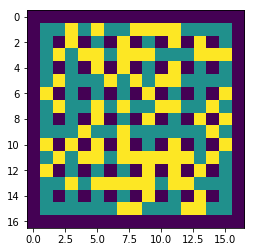

In [145]:
plt.imshow(d["arena"].T)

In [146]:
pd.DataFrame(d["arena"].T)

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
1   -1   0   0   1   0   1   0   0   1   1   1   1   0   0   0   0  -1
2   -1   0  -1   1  -1   0  -1   1  -1   0  -1   1  -1   1  -1   0  -1
3   -1   0   1   0   1   1   0   1   1   1   0   0   0   1   1   1  -1
4   -1   0  -1   0  -1   1  -1   1  -1   0  -1   1  -1   0  -1   0  -1
5   -1   0   1   0   0   0   1   0   1   0   1   1   0   0   0   0  -1
6   -1   1  -1   0  -1   0  -1   0  -1   1  -1   0  -1   0  -1   1  -1
7   -1   0   1   0   0   1   0   1   0   0   1   1   0   0   1   0  -1
8   -1   0  -1   0  -1   1  -1   0  -1   1  -1   0  -1   1  -1   1  -1
9   -1   0   0   0   1   0   0   1   0   0   0   0   0   0   1   0  -1
10  -1   1  -1   1  -1   1  -1   1  -1   0  -1   1  -1   0  -1   1  -1
11  -1   0   1   0   1   1   0   1   1   1   1   1   1   0   1   0  -1
12  -1   1  -1   0  -1   0  -1   0  -1   1  -1   1  -1   1  -1   0  -1
13  -1   0   0   1   0   1   1   1   1   1   0   1   1   0   0   0  -1
14  -1   0  -1   0  -1   0  -1   0  -1   1  -1   0  -1   1  -1   0  -1
15  -1   0   0   0   0   0   0   1   1   0   0   0   1   1   0   0  -1
16  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1

In [7]:
df.columns

Index(['NAME', 'X', 'Y', 'STEP', 'ACTIVE_AGENTS', 'CLOSEST_DISTANCE_BOMB',
       'CLOSEST_DISTANCE_COIN', 'CLOSEST_DISTANCE_OTHERS',
       'COIN_POTENTIAL_DOWN', 'COIN_POTENTIAL_LEFT', 'COIN_POTENTIAL_RIGHT',
       'COIN_POTENTIAL_UP', 'CRATES_TO_DESTROY_CENTER',
       'CRATES_TO_DESTROY_DOWN', 'CRATES_TO_DESTROY_LEFT',
       'CRATES_TO_DESTROY_RIGHT', 'CRATES_TO_DESTROY_UP',
       'DANGER_LEVEL_CENTER', 'DANGER_LEVEL_DOWN', 'DANGER_LEVEL_LEFT',
       'DANGER_LEVEL_RIGHT', 'DANGER_LEVEL_UP', 'DEAD_END_DOWN',
       'DEAD_END_LEFT', 'DEAD_END_RIGHT', 'DEAD_END_UP', 'DOF_DOWN',
       'DOF_LEFT', 'DOF_RIGHT', 'DOF_UP', 'MAX_COIN_POTENTIAL_DOWN',
       'MAX_COIN_POTENTIAL_LEFT', 'MAX_COIN_POTENTIAL_RIGHT',
       'MAX_COIN_POTENTIAL_UP', 'MAX_OTHER_PLAYER_POTENTIAL_DOWN',
       'MAX_OTHER_PLAYER_POTENTIAL_LEFT', 'MAX_OTHER_PLAYER_POTENTIAL_RIGHT',
       'MAX_OTHER_PLAYER_POTENTIAL_UP', 'OTHER_PLAYER_POTENTIAL_DOWN',
       'OTHER_PLAYER_POTENTIAL_LEFT', 'OTHER_PLAYER_POTENTIAL_R

In [8]:
important_columns = ["NAME", "X", "Y", "STEP", "CLOSEST_DISTANCE_COIN", "AVAILABLE_ACTIONS", "PROBABILITIES", "NEXT_EVENT", "RELATIVE_X", "RELATIVE_Y"] + [i for i in df.columns if i.startswith(("MAX_COIN", "DOF", "NEX_EVENT", "COIN_POT", "PREVIOUS_EVENT"))]

In [9]:
df[important_columns].head(10)

NAME   X  Y  STEP  CLOSEST_DISTANCE_COIN  \
0  super_agent   9  2   154                  0.964   
1  super_agent   9  2   154                  0.964   
2  super_agent   9  3   153                  0.929   
3  super_agent   9  3   153                  0.929   
4  super_agent   9  3   153                  0.929   
5  super_agent   9  3   153                  0.929   
6  super_agent  10  3   152                  0.893   
7  super_agent  10  3   152                  0.893   
8  super_agent  11  3   151                  0.857   
9  super_agent  11  3   151                  0.857   

              AVAILABLE_ACTIONS  \
0                 ['UP' 'DOWN']   
1                 ['UP' 'DOWN']   
2  ['LEFT' 'UP' 'RIGHT' 'DOWN']   
3  ['LEFT' 'UP' 'RIGHT' 'DOWN']   
4  ['LEFT' 'UP' 'RIGHT' 'DOWN']   
5  ['LEFT' 'UP' 'RIGHT' 'DOWN']   
6              ['LEFT' 'RIGHT']   
7              ['LEFT' 'RIGHT']   
8  ['LEFT' 'UP' 'RIGHT' 'DOWN']   
9  ['LEFT' 'UP' 'RIGHT' 'DOWN']   

                                       PROBABILITIES NEXT_EVENT  RELATIVE_X  \
0                          [ 0.88054392 -0.12249339]         UP        0.07   
1                          [ 0.88054392 -0.12249339]         UP        0.07   
2  [-0.13547317  0.50130108 -0.07923999 -0.12949739]         UP        0.07   
3  [-0.13547317  0.50130108 -0.07923999 -0.12949739]         UP        0.07   
4  [-0.13547317  0.50130108 -0.07923999 -0.12949739]         UP        0.07   
5  [-0.13547317  0.50130108 -0.07923999 -0.12949739]         UP        0.07   
6                          [ 0.19866351 -0.13310732]       LEFT        0.20   
7                          [ 0.19866351 -0.13310732]       LEFT        0.20   
8  [-0.04095137 -0.08584703 -0.13236946 -0.12459938]       LEFT        0.33   
9  [-0.04095137 -0.08584703 -0.13236946 -0.12459938]       LEFT        0.33   

   RELATIVE_Y  COIN_POTENTIAL_DOWN  COIN_POTENTIAL_LEFT  COIN_POTENTIAL_RIGHT  \
0        0.87                0.333                0.333                 0.333   
1        0.87                0.333                0.333                 0.333   
2        0.73                0.250                0.250                 0.250   
3        0.73                0.250                0.250                 0.250   
4        0.73                0.250                0.250                 0.250   
5        0.73                0.250                0.250                 0.250   
6        0.73                0.200                0.333                 0.200   
7        0.73                0.200                0.333                 0.200   
8        0.73                0.167                0.250                 0.167   
9        0.73                0.167                0.250                 0.167   

   COIN_POTENTIAL_UP  DOF_DOWN  DOF_LEFT  DOF_RIGHT  DOF_UP  \
0              1.000         4         0          0       3   
1              1.000         4         0          0       3   
2              0.500         2         2          2       2   
3              0.500         2         2          2       2   
4              0.500         2         2          2       2   
5              0.500         2         2          2       2   
6              0.333         0         4          4       0   
7              0.333         0         4          4       0   
8              0.250         2         2          2       2   
9              0.250         2         2          2       2   

   MAX_COIN_POTENTIAL_DOWN  MAX_COIN_POTENTIAL_LEFT  MAX_COIN_POTENTIAL_RIGHT  \
0                        0                        0                         0   
1                        0                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        0                        0                         0   
5                        0                        0                         0   
6     

In [51]:
df[df.STEP == 327][important_columns].head(10)

Empty DataFrame
Columns: [NAME, X, Y, STEP, CLOSEST_DISTANCE_COIN, AVAILABLE_ACTIONS, PROBABILITIES, NEXT_EVENT, COIN_POTENTIAL_DOWN, COIN_POTENTIAL_LEFT, COIN_POTENTIAL_RIGHT, COIN_POTENTIAL_UP, DOF_DOWN, DOF_LEFT, DOF_RIGHT, DOF_UP, MAX_COIN_POTENTIAL_DOWN, MAX_COIN_POTENTIAL_LEFT, MAX_COIN_POTENTIAL_RIGHT, MAX_COIN_POTENTIAL_UP]
Index: []

In [111]:
game_state = d.copy()
others = [np.array([[i[0], i[1]]]) for i in d["others"]]
arena = np.atleast_3d(d["arena"])
# manipulate arena and append frame
arena19x19 = dh.manipulate_arena([d["coins"]], others, [
                                   d["bombs"]], arena)

30
-12 -1 0 -1


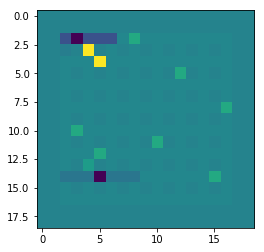

In [130]:
x_ = 3
y_ = 2
x,y = x_+1, y_+1
arena = arena19x19[:, :, 0]
arena[y, x] = 30
print(arena[y, x])
print(arena[y-1, x], arena[y, x-1], arena[y+1, x], arena[y, x+1])
plt.imshow(arena)

In [131]:
print(x_,y_)
dh.contact_to_explosion(x_, y_, 0, arena19x19)

3 2


{'CENTER': 0, 'UP': 1, 'RIGHT': 0, 'DOWN': 0, 'LEFT': 0}

In [55]:
df = pd.read_csv("../dataForPrediction.csv", index_col = 0)

In [57]:
df[[i for i in df.columns if i.startswith(("OTHER", "MAX", "NAME"))]]

NAME  MAX_COIN_POTENTIAL_DOWN  MAX_COIN_POTENTIAL_LEFT  \
0  super_agent_0                        0                        0   
1  super_agent_0                        0                        0   
2  super_agent_0                        0                        0   
3  super_agent_0                        0                        0   
4  super_agent_0                        0                        0   

   MAX_COIN_POTENTIAL_RIGHT  MAX_COIN_POTENTIAL_UP  \
0                         0                      0   
1                         0                      0   
2                         0                      0   
3                         0                      0   
4                         0                      0   

   MAX_OTHER_PLAYER_POTENTIAL_DOWN  MAX_OTHER_PLAYER_POTENTIAL_LEFT  \
0                                1                                0   
1                                1                                0   
2                                1                                0   
3                                1                                0   
4                                1                                0   

   MAX_OTHER_PLAYER_POTENTIAL_RIGHT  MAX_OTHER_PLAYER_POTENTIAL_UP  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   

   OTHER_PLAYER_POTENTIAL_DOWN  OTHER_PLAYER_POTENTIAL_LEFT  \
0                     0.194017                     0.174603   
1                     0.194017                     0.174603   
2                     0.194017                     0.174603   
3                     0.194017                     0.174603   
4                     0.194017                     0.174603   

   OTHER_PLAYER_POTENTIAL_RIGHT  OTHER_PLAYER_POTENTIAL_UP  
0                      0.184295                   0.181548  
1                      0.184295                   0.181548  
2                      0.184295                   0.181548  
3                      0.184295                   0.181548  
4                      0.184295                   0.181548

## analyze pickle file 

In [21]:
infile = open("../training_data_cratedensity075/time15522303771992571crates075r4su0si0q0u0maxsteps400.pickle",'rb')
d =  pickle.load(infile)

In [22]:
d.keys()

dict_keys(['agents', 'arena', 'step', 'bombs', 'coins', 'active_agents', 'random_agent_0_xy', 'random_agent_0_next_event', 'random_agent_0_score', 'random_agent_1_xy', 'random_agent_1_next_event', 'random_agent_1_score', 'random_agent_2_xy', 'random_agent_2_next_event', 'random_agent_2_score', 'random_agent_3_xy', 'random_agent_3_next_event', 'random_agent_3_score'])

In [23]:
os.listdir("../training_data_cratedensity075")

['time155222979827723crates075r2su0si2q0u0maxsteps400.pickle',
 'time155223021517275crates075r2su0si2q0u0maxsteps400.pickle',
 'time15522305005538619crates075r0su0si4q0u0maxsteps400.pickle',
 'time15522303856354969crates075r4su0si0q0u0maxsteps400.pickle',
 'time1552229724106663crates075r2su0si2q0u0maxsteps400.pickle',
 'time1552230216289255crates075r2su0si2q0u0maxsteps400.pickle',
 'time15522298384024708crates075r2su0si2q0u0maxsteps400.pickle',
 'time1552229832604612crates075r2su0si2q0u0maxsteps400.pickle',
 'time1552230391708703crates075r4su0si0q0u0maxsteps400.pickle',
 'time1552230440092159crates075r0su0si4q0u0maxsteps400.pickle',
 'time1552230394182699crates075r4su0si0q0u0maxsteps400.pickle',
 'time1552229792687192crates075r2su0si2q0u0maxsteps400.pickle',
 'time155222983540124crates075r2su0si2q0u0maxsteps400.pickle',
 'time15522304537119591crates075r0su0si4q0u0maxsteps400.pickle',
 'time1552230507433152crates075r0su0si4q0u0maxsteps400.pickle',
 'time1552229795957193crates075r2su0si2

In [25]:
d["random_agent_2_next_event"][-5:]

[7, 1, 6, 6, 6]

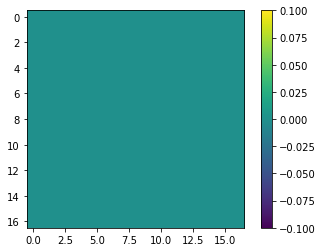

In [31]:
plt.imshow(cp.potential_playground)
plt.colorbar()
plt.show()
pd.DataFrame(cp.potential_playground).style.background_gradient()

In [32]:
cp.get_potential_features(11, 4, cp.potential_playground)

{'LEFT': 0.0, 'UP': 0.0, 'RIGHT': 0.0, 'DOWN': 0.0}

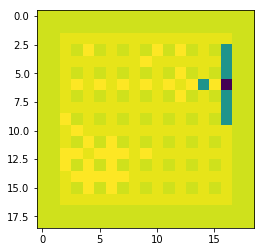

In [33]:
arena19x19 = dh.arena_append_frame(np.atleast_3d(d["arena"]))
plt.imshow(arena19x19[:,:,0])

In [34]:
d["arena"].shape

(17, 17)

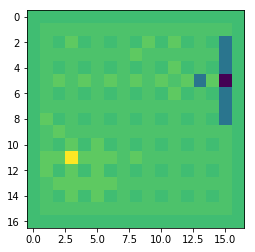

In [71]:
a = d["arena"].copy()
x = 3
y = 11
a[y, x] = 10
#plt.colorbar()
plt.imshow(a)
plt.show()

In [90]:
pd.DataFrame(a)

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
1   -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1
2   -1   0  -1   1  -1   0  -1   0  -1   1  -1   1  -1   0  -1 -12  -1
3   -1   0   0   0   0   0   0   0   1   0   0   0   0   0   0 -12  -1
4   -1   0  -1   0  -1   0  -1   0  -1   0  -1   1  -1   0  -1 -12  -1
5   -1   0   1   0   1   0   1   0   1   0   1   0   1 -12   1 -26  -1
6   -1   0  -1   0  -1   0  -1   0  -1   0  -1   1  -1   0  -1 -12  -1
7   -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0 -12  -1
8   -1   1  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1 -12  -1
9   -1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0  -1
10  -1   0  -1   1  -1   1  -1   0  -1   0  -1   0  -1   0  -1   0  -1
11  -1   1   1  10   1   1   1   0   1   0   0   0   0   0   0   0  -1
12  -1   1  -1   1  -1   1  -1   0  -1   0  -1   0  -1   0  -1   0  -1
13  -1   0   1   1   1   1   1   0   0   0   0   0   0   0   0   0  -1
14  -1   0  -1   1  -1   1  -1   0  -1   0  -1   0  -1   0  -1   0  -1
15  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1
16  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1

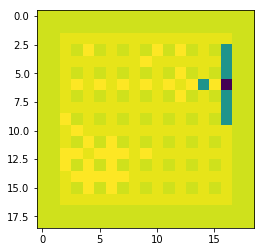

In [93]:
plt.imshow(arena19x19[:,:,0])

In [85]:
a.shape == (17, 17)

True

In [88]:
#arena19x19

In [128]:
dh.bombs_and_crates(x, y, 0, np.atleast_3d(d["arena"]))

{'CENTER': 9, 'UP': 0, 'RIGHT': 0, 'DOWN': 0, 'LEFT': 0}

In [129]:
dh.bombs_and_crates(x, y, 0, arena19x19)

shift


{'CENTER': 9, 'UP': 0, 'RIGHT': 0, 'DOWN': 0, 'LEFT': 0}

In [134]:
l = np.sort(os.listdir("../training_data/"))
l

array(['time1552045746694782crates075r0su0si0q0u1maxsteps400.pickle',
       'time15520458707879071crates075r0su0si0q0u1maxsteps400.pickle',
       'time15520459251321669crates075r0su0si0q0u1maxsteps400.pickle',
       'time1552046177984086crates075r0su0si1q0u0r0su1si1q0u0r0su1si1q0u1maxsteps400.pickle',
       'time15520463570035279crates075r0su1si1q0u1maxsteps5.pickle',
       'time15520463837078211crates075r0su1si0q0u1maxsteps5.pickle',
       'time1552046442973582crates075r0su1si2q0u1maxsteps5.pickle',
       'time1552047905347397crates075r0su1si2q0u1maxsteps5.pickle',
       'time1552047918188309crates075r0su1si2q0u1maxsteps5.pickle'],
      dtype='<U83')

In [156]:
df = dh.pickle_to_df("../training_data/time1552049371237219crates075r0su1si2q0u1maxsteps5.pickle")

position CENTER: 0.000000
position UP: 0.000000
RIGHT 17 16 -1 continue
DOWN 16 17 -1 continue
position LEFT: 0.000000
{'CENTER': 4, 'UP': 3, 'RIGHT': 0, 'DOWN': 0, 'LEFT': 3}
position CENTER: 0.000000
UP 16 14 1 continue
RIGHT 17 15 -1 continue
position DOWN: 0.000000
LEFT 15 15 -1 continue
{'CENTER': 3, 'UP': 0, 'RIGHT': 0, 'DOWN': 4, 'LEFT': 0}
position CENTER: 0.000000
UP 16 14 1 continue
RIGHT 17 15 -1 continue
DOWN 16 16 -4 continue
LEFT 15 15 -1 continue
{'CENTER': 3, 'UP': 0, 'RIGHT': 0, 'DOWN': 0, 'LEFT': 0}
position CENTER: 0.000000
UP 16 15 -26 continue
RIGHT 17 16 -1 continue
DOWN 16 17 -1 continue
position LEFT: 0.000000
{'CENTER': 4, 'UP': 0, 'RIGHT': 0, 'DOWN': 0, 'LEFT': 3}
position CENTER: 0.000000
UP 15 15 -1 continue
position RIGHT: 0.000000
DOWN 15 17 -1 continue
LEFT 14 16 1 continue
{'CENTER': 3, 'UP': 0, 'RIGHT': 4, 'DOWN': 0, 'LEFT': 0}
position CENTER: 0.000000
UP 16 15 -26 continue
RIGHT 17 16 -1 continue
DOWN 16 17 -1 continue
position LEFT: 0.000000
{'CENTER

In [158]:
df[df.NAME == "user_agent"]

ACTIVE_AGENTS  COIN_POTENTIAL_DOWN  COIN_POTENTIAL_LEFT  \
18              4                  0.0                  0.0   
19              4                  0.0                  0.0   
20              4                  0.0                  0.0   
21              4                  0.0                  0.0   
22              4                  0.0                  0.0   
23              4                  0.0                  0.0   

    COIN_POTENTIAL_RIGHT  COIN_POTENTIAL_UP  CRATES_TO_DESTROY_CENTER  \
18                   0.0                0.0                         2   
19                   0.0                0.0                         2   
20                   0.0                0.0                         2   
21                   0.0                0.0                         2   
22                   0.0                0.0                         2   
23                   0.0                0.0                         2   

    CRATES_TO_DESTROY_DOWN  CRATES_TO_DESTROY_LEFT  CRATES_TO_DESTROY_RIGHT  \
18                       2                       2                        0   
19                       2                       2                        0   
20                       2                       2                        0   
21                       2                       2                        0   
22                       2                       2                        0   
23                       2                       2                        0   

    CRATES_TO_DESTROY_UP  CURRENT_SCORE  DANGER_LEVEL_CENTER  \
18                     0              0                  0.0   
19                     0              0                  0.0   
20                     0              0                  0.0   
21                     0              0                  0.0   
22                     0              0                  0.0   
23                     0              0                  0.0   

    DANGER_LEVEL_DOWN  DANGER_LEVEL_LEFT  DANGER_LEVEL_RIGHT  DANGER_LEVEL_UP  \
18                0.0                0.0                 0.0              0.0   
19                0.0                0.0                 0.0              0.0   
20                0.0                0.0                 0.0              0.0   
21                0.0                0.0                 0.0              0.0   
22                0.0                0.0                 0.0              0.0   
23                0.0                0.0                 0.0              0.0   

    DOF_DOWN  DOF_LEFT  DOF_RIGHT  DOF_UP  MAX_COIN_POTENTIAL_DOWN  \
18         2         2          0       0                        0   
19         2         2          0       0                        0   
20         2         2          0       0                        0   
21         2         2          0       0                        0   
22         2         2          0       0                        0   
23         2         2          0       0                        0   

    MAX_COIN_POTENTIAL_LEFT  MAX_COIN_POTENTIAL_RIGHT  MAX_COIN_POTENTIAL_UP  \
18                        1                         0                      0   
19                        1                         0                      0   
20                        1                         0                      0   
21                        1                         0                      0   
22                        1                         0                      0   
23                        1                         0                      0   

    MAX_STEP        NAME  NEXT_SCORE  STEP   X  Y  WINNER  NEXT_EVENT_BOMB  \
18         5  user_agent           0     0  15  1       0                0   
19         5  user_agent           0     1  15  1       0                0   
20         5  user_agent           0     2  15  1       0                0   
21         5  user_agent           0     3  15  1       0                0   
22         5  user_agent           0 

In [148]:
df[df.NAME == "user_agent"][["NAME", "STEP"]+ [i for i in df.columns if i.startswith("CRATES")]]



NAME  STEP  CRATES_TO_DESTROY_CENTER  CRATES_TO_DESTROY_DOWN  \
18  user_agent     0                         4                       3   
19  user_agent     1                         4                       3   
20  user_agent     2                         4                       3   
21  user_agent     3                         4                       3   
22  user_agent     4                         4                       3   
23  user_agent     5                         4                       3   

    CRATES_TO_DESTROY_LEFT  CRATES_TO_DESTROY_RIGHT  CRATES_TO_DESTROY_UP  
18                       3                        0                     0  
19                       3                        0                     0  
20                       3                        0                     0  
21                       3                        0                     0  
22                       3                        0                     0  
23                       3                        0                     0

In [154]:
df[df.NAME == "simple_agent_0"][["NAME", "STEP"]+ [i for i in df.columns if i.startswith(("CRATES", "DOF"))]]


NAME  STEP  CRATES_TO_DESTROY_CENTER  CRATES_TO_DESTROY_DOWN  \
0  simple_agent_0     0                         2                       0   
1  simple_agent_0     1                         2                       0   
2  simple_agent_0     2                         2                       0   
3  simple_agent_0     3                         2                       0   
4  simple_agent_0     4                         2                       2   
5  simple_agent_0     5                         4                       2   

   CRATES_TO_DESTROY_LEFT  CRATES_TO_DESTROY_RIGHT  CRATES_TO_DESTROY_UP  \
0                       0                        2                     2   
1                       2                        0                     0   
2                       0                        0                     0   
3                       0                        0                     2   
4                       0                        0                     4   
5                       0                        3                     0   

   DOF_DOWN  DOF_LEFT  DOF_RIGHT  DOF_UP  
0         0         0          1       2  
1         0         2          0       0  
2         0         2          0       0  
3         0         0          1       2  
4         2         0          0       2  
5         2         0          1       0

In [233]:
pd.DataFrame(arena19x19[:,:,0])
# matrix = arena19x19.copy()
#matrix = np.where((matrix == 1) | (matrix == -1) | (matrix==0), 0, matrix)
#matrix[:,:,0]

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18
0   -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
1   -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
2   -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1  -1
3   -1  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1  -1
4   -1  -1   8   0   0   0   0   0   0   0   0   0   0   0   0   0   8  -1  -1
5   -1  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1  -1
6   -1  -1   0   0   0   0   0   0   0   0   8   0   0   0   0   0   0  -1  -1
7   -1  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1  -1
8   -1  -1   8   0   0   0   0   0   0   0   0   8   0   0   0   0   0  -1  -1
9   -1  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1  -1
10  -1  -1   0   0   0   0   0   0   0   0   0   0   0   0   8   0   0  -1  -1
11  -1  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1  -1
12  -1  -1   0   0   0   0   8   0   0   0   0   0   0   0   0   0   0  -1  -1
13  -1  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1   0  -1  -1
14  -1  -1   0   0   0   0   0   0   0   0   0   0   0   8   0   0   0  -1  -1
15  -1  -1   0  -1   0  -1   0  -1   0  -1   8  -1   0  -1   0  -1   0  -1  -1
16  -1  -1  -2   0   0   0   0   0   0   0   0   0   0   0   0   0   0  -1  -1
17  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
18  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1

In [234]:
dl = dh.dangerous_level(15, 15, 0, arena19x19)
dl

{'LEFT': 0.0, 'UP': 0.0, 'RIGHT': 0.0, 'DOWN': 0.0, 'CENTER': 0.0}

In [235]:
X = pd.read_csv("../dataForPrediction.csv", index_col = 0)

In [236]:
X.head()

ACTIVE_AGENTS  COIN_POTENTIAL_DOWN  COIN_POTENTIAL_LEFT  \
0              1            21.833851            15.044809   
1              1            21.833851            15.044809   
2              1            21.833851            15.044809   
3              1            21.833851            15.044809   
4              1            33.080271            17.516880   

   COIN_POTENTIAL_RIGHT  COIN_POTENTIAL_UP  DANGEROUS_LEVEL_CENTER  \
0             16.000518          15.044809                     0.0   
1             16.000518          15.044809                     0.0   
2             16.000518          15.044809                     0.0   
3             16.000518          15.044809                     0.0   
4             18.604080          17.516880                     0.0   

   DANGEROUS_LEVEL_DOWN  DANGEROUS_LEVEL_LEFT  DANGEROUS_LEVEL_RIGHT  \
0                   0.0                   0.0                    0.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   0.0                    0.0   
3                   0.0                   0.0                    0.0   
4                   0.0                   0.0                    0.0   

   DANGEROUS_LEVEL_UP  DOF_DOWN  DOF_LEFT  DOF_RIGHT  DOF_UP  NEXT_EVENT_BOMB  \
0                 0.0         2         0          2       0                0   
1                 0.0         2         0          2       0                1   
2                 0.0         2         0          2       0                0   
3                 0.0         2         0          2       0                0   
4                 0.0         3         0          0       2                0   

   NEXT_EVENT_DOWN  NEXT_EVENT_LEFT  NEXT_EVENT_RIGHT  NEXT_EVENT_UP  \
0                0                0                 0              0   
1                0                0                 0              0   
2                0                0                 1              0   
3                1                0                 0              0   
4                0                0                 0              0   

   NEXT_EVENT_WAIT NEXT_EVENT  X  Y         NAME  BOMB  STEP  
0                1       DOWN  1  1  super_agent     1     1  
1                0       DOWN  1  1  super_agent     1     1  
2                0       DOWN  1  1  super_agent     1     1  
3                0       DOWN  1  1  super_agent     1     1  
4                1         UP  1  2  super_agent     1     2

In [237]:
["DOWN", "LEFT", "RIGHT", "UP"]
np.argmax(X[["COIN_POTENTIAL_DOWN", "COIN_POTENTIAL_LEFT", "COIN_POTENTIAL_RIGHT", "COIN_POTENTIAL_UP"]].iloc, axis=0)
#X.apply(lambda i: np.argmax(i[["COIN_POTENTIAL_DOWN", "COIN_POTENTIAL_LEFT", "COIN_POTENTIAL_RIGHT", "COIN_POTENTIAL_UP"]]))
#X.apply(lambda i: i.COIN_POTENTIAL_DOWN +1 )
for i in range(len(X)): 
    X.loc[i, "ARGMAX"] = X[["COIN_POTENTIAL_DOWN", 
                            "COIN_POTENTIAL_LEFT", 
                            "COIN_POTENTIAL_RIGHT", 
                            "COIN_POTENTIAL_UP"]].iloc[i].argmax()
    X.loc[i, "EVENT"] =X[["NEXT_EVENT_BOMB", 
                          "NEXT_EVENT_LEFT", 
                          "NEXT_EVENT_RIGHT", 
                          "NEXT_EVENT_UP",
                          "NEXT_EVENT_WAIT", 
                          "NEXT_EVENT_DOWN"]].iloc[i].argmax()






/Users/ss/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if __name__ == '__main__':
/Users/ss/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  from ipykernel import kernelapp as app


In [243]:
debug = X.groupby("STEP").first()
#debug.tail(20)


X.tail()

ACTIVE_AGENTS  COIN_POTENTIAL_DOWN  COIN_POTENTIAL_LEFT  \
191              1            33.080271            17.516880   
192              1            21.833851            15.044809   
193              1            21.833851            15.044809   
194              1            21.833851            15.044809   
195              1            21.833851            15.044809   

     COIN_POTENTIAL_RIGHT  COIN_POTENTIAL_UP  DANGEROUS_LEVEL_CENTER  \
191             18.604080          17.516880                     0.0   
192             16.000518          15.044809                     0.0   
193             16.000518          15.044809                     0.0   
194             16.000518          15.044809                     0.0   
195             16.000518          15.044809                     0.0   

     DANGEROUS_LEVEL_DOWN  DANGEROUS_LEVEL_LEFT  DANGEROUS_LEVEL_RIGHT  \
191                   0.0                   0.0                    0.0   
192                   0.0                   0.0                    0.0   
193                   0.0                   0.0                    0.0   
194                   0.0                   0.0                    0.0   
195                   0.0                   0.0                    0.0   

     DANGEROUS_LEVEL_UP  DOF_DOWN  DOF_LEFT  DOF_RIGHT  DOF_UP  \
191                 0.0         3         0          0       2   
192                 0.0         2         0          2       0   
193                 0.0         2         0          2       0   
194                 0.0         2         0          2       0   
195                 0.0         2         0          2       0   

     NEXT_EVENT_BOMB  NEXT_EVENT_DOWN  NEXT_EVENT_LEFT  NEXT_EVENT_RIGHT  \
191                0                1                0                 0   
192                0                0                0                 0   
193                1                0                0                 0   
194                0                0                0                 1   
195                0                1                0                 0   

     NEXT_EVENT_UP  NEXT_EVENT_WAIT NEXT_EVENT  X  Y         NAME  BOMB  STEP  \
191              0                0         UP  1  2  super_agent     1    48   
192              0                1      RIGHT  1  1  super_agent     1    49   
193              0                0      RIGHT  1  1  super_agent     1    49   
194              0                0      RIGHT  1  1  super_agent     1    49   
195              0                0      RIGHT  1  1  super_agent     1    49   

                  ARGMAX             EVENT  
191  COIN_POTENTIAL_DOWN   NEXT_EVENT_DOWN  
192  COIN_POTENTIAL_DOWN   NEXT_EVENT_WAIT  
193  COIN_POTENTIAL_DOWN   NEXT_EVENT_BOMB  
194  COIN_POTENTIAL_DOWN  NEXT_EVENT_RIGHT  
195  COIN_POTENTIAL_DOWN   NEXT_EVENT_DOWN

In [239]:
infile = open("../randomforestregressor.pickle",'rb')
model_dict =  pickle.load(infile)
model = model_dict["model"]
features = model_dict["features"]
target = model_dict["target"]

In [242]:
#a = model.predict_proba(X.loc[350:355, features])

In [241]:
a

array([[0.02, 0.  , 0.98],
       [0.99, 0.  , 0.01],
       [0.01, 0.  , 0.99],
       [0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  ]])

In [170]:
a[:,2]

array([0.98, 0.01, 0.99, 0.99, 1.  ])

In [210]:
low_risk_actions = np.where(a[:,0]<0.3)

In [211]:
low_risk_actions

(array([0, 2, 3, 4]),)

In [216]:
a[low_risk_actions[0]][:,2]

array([0.98, 0.99, 0.99, 1.  ])

In [225]:
possible_actions = np.array([0, 1, 2, 3, 4, 5, 6])

In [226]:
possible_actions[low_risk_actions[0][hp_actions]]

array([0, 2, 3, 4])

In [224]:
low_risk_actions[0][hp_actions]

array([0, 2, 3, 4])

In [180]:
a[low_risk_actions][:,2]

array([0.98, 0.99, 0.99, 1.  ])

In [219]:
hp_actions = np.where(a[low_risk_actions][:,2]>0.97)

In [196]:
ind

(array([0, 1, 2, 3]),)

In [202]:

r = np.random.randint(4)
r

0

In [203]:
ind[0][r]

0

In [199]:
len(ind[0])

4

In [188]:
ind[0]

array([0, 1, 2, 3])

In [192]:
low_risk_actions[0][ind[0]]

array([0, 2, 3, 4])